In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [5]:
iris = pd.read_csv(r"C:\Users\Paawan\Downloads\Iris.csv")

In [6]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
iris.shape

(150, 6)

In [9]:
iris.describe

<bound method NDFrame.describe of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-se

In [10]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

class knnMDS:
    def __init__(self, k=5, distance_fn=euclidean_distance):
        self.k = k
        self.distance_fn = distance_fn

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)

    def _predict(self, x):
        distances = [self.distance_fn(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

In [11]:
iris['Species'] = iris['Species'].map({
    'Iris-setosa': 0, 
    'Iris-versicolor': 1, 
    'Iris-virginica': 2
})

In [12]:
x = iris[['SepalLengthCm', "SepalWidthCm" ,	"PetalLengthCm" ,"PetalWidthCm" ]].values
y = iris['Species'].values

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=2315, shuffle=True, stratify=y)

labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']


In [13]:
from collections import Counter

In [14]:
accuracy_scores = []

for i in range(1, 10):
    knn = knnMDS(k=i)
    knn.fit(x_train, y_train)
    predictions = knn.predict(x_test)
    print(f"K = {i}")
    print(classification_report(y_test, predictions, target_names=labels))
    accuracy_scores.append(accuracy_score(y_test, predictions))

K = 1
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30

K = 2
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30

K = 3
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-

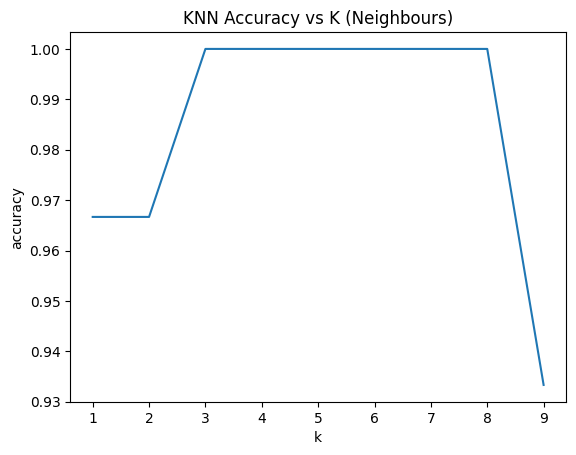

In [15]:
sns.lineplot(x=range(1, len(accuracy_scores) + 1), y=accuracy_scores)
plt.title('KNN Accuracy vs K (Neighbours)')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.show()

In [16]:
from sklearn.metrics import confusion_matrix

In [17]:
def plot_confusion_matrix(y_true, y_pred, labels, normalize=False, title="Confusion Matrix", cmap="Blues"):
    cm = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt=".0f" if normalize else "d", cmap=cmap, xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

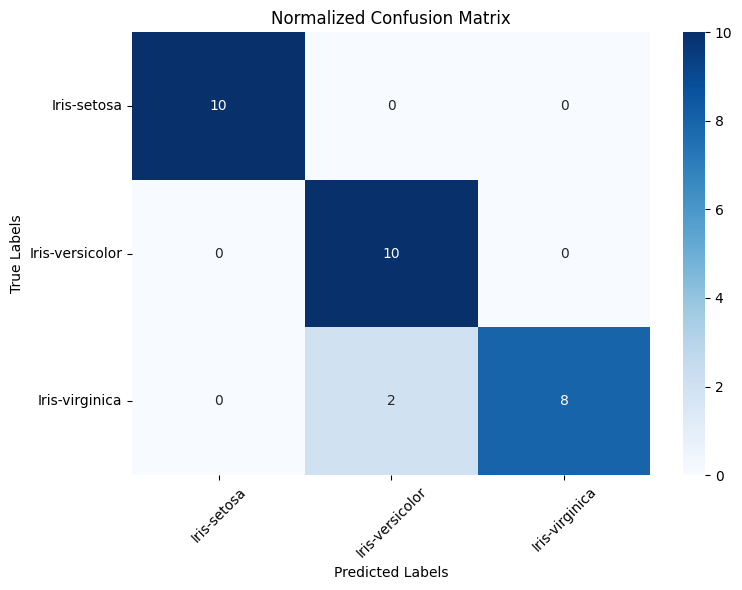

In [18]:
plot_confusion_matrix(
    y_true=y_test, 
    y_pred=predictions, 
    labels=labels, 
    normalize=True,  # Set to False if you want raw counts
    title="Normalized Confusion Matrix"
)
